 Acurácia obtida com os dados de treinamento: 1.0

 Acurácia obtida com os dados de teste 0.82


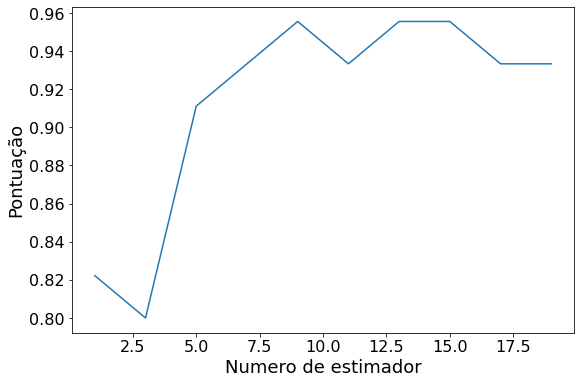

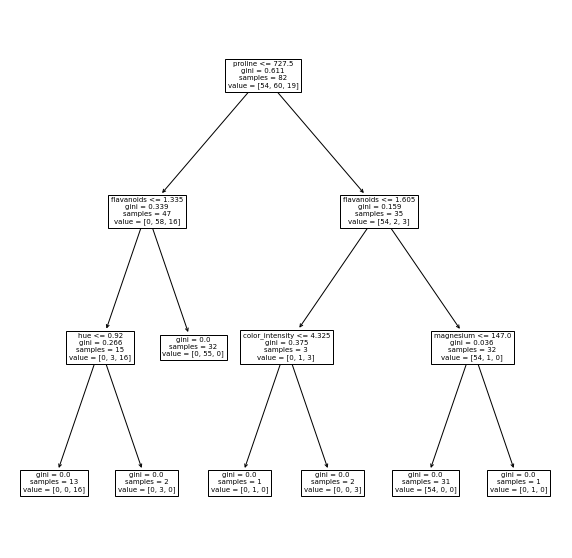

In [13]:
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dados = datasets.load_wine( as_frame = True)

X = dados.data
y= dados.target 

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.25, random_state=22)

dtree = DecisionTreeClassifier(random_state=22)
dtree.fit(X_treino, y_treino)

y_predito = dtree.predict(X_teste)

print(f' Acurácia obtida com os dados de treinamento: {accuracy_score(y_true = y_treino, y_pred = dtree.predict(X_treino))}')

print(f'\n Acurácia obtida com os dados de teste {accuracy_score(y_true = y_teste, y_pred = y_predito) :0.2f}')


from sklearn.ensemble import BaggingClassifier

intervalo_estimador = [ 1, 3, 5, 7 , 9, 11, 13, 15,17, 19]

modelos= []
pontos = []

for n_estimadors in intervalo_estimador:
    clf = BaggingClassifier(n_estimators=n_estimadors, random_state=22)

    clf.fit(X_treino, y_treino)

    modelos.append(clf)

    pontos.append(accuracy_score(y_true = y_teste, y_pred = clf.predict(X_teste)))

plt.figure(figsize =(9,6))

plt.plot(intervalo_estimador,pontos)
plt.xlabel("Numero de estimador", fontsize=18)
plt.ylabel("Pontuação",fontsize=18)
plt.tick_params(labelsize = 16)
plt.show()

clf = BaggingClassifier(n_estimators=13, oob_score=True, random_state=22)

clf.fit(X_treino,y_treino)
plt.figure(figsize=(10,10))
plot_tree(clf.estimators_[0],feature_names=X.columns)

plt.show()

Acuracia: 0.95
Matriz de confusao
[[  0  50]
 [  0 950]]
Acuracia para a classe A: 0.0
Acuracia para a classe B: 1.0
Acuracia: 0.706
[[  6  44]
 [250 700]]
Acuracia classe A: 0.12
Acuracia para a classe B: 0.7368421052631579
Valor AUC para o modelo 1 : 0.5


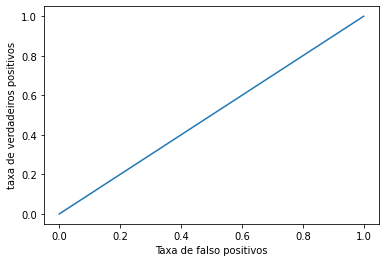

Valor AUC para o modelo 2 : 0.11193684210526315


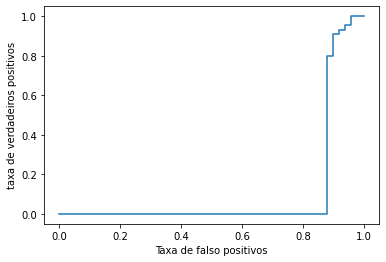

In [15]:
from cv2 import threshold 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

n = 1000
razao = 0.95
n_A = int((1-razao)*n)
n_B = int(razao*n)

y = np.array([0]*n_A + [1] *n_B)

y_proba_1 = np.array([1]*n)

y_pred_1 = y_proba_1 >.5

print(f'Acuracia: {accuracy_score(y,y_pred_1)}')
cf_mat = confusion_matrix(y,y_pred_1)
print(f'Matriz de confusao')
print(cf_mat)

print(f'Acuracia para a classe A: {cf_mat[0][0]/n_A}')
print(f'Acuracia para a classe B: {cf_mat[1][1]/n_B}')

y_proba_2 = np.array(
    np.random.uniform(0,7,n_A).tolist()+
    np.random.uniform(0.3,1,n_B).tolist()
)

y_pred_2 = y_proba_2 > .5

print(f'Acuracia: {accuracy_score(y,y_pred_2)}')
cf_mat = confusion_matrix(y,y_pred_2)
print(cf_mat)

print(f'Acuracia classe A: {cf_mat[0][0]/n_A}')
print(f'Acuracia para a classe B: {cf_mat[1][1]/n_B}')


def pltoa_Cruva_ROC(y_verdadeiro, y_prob):
    false_positive_rate, true_positive_rate, _ = roc_curve(y_verdadeiro, y_prob)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('Taxa de falso positivos')
    plt.ylabel('taxa de verdadeiros positivos')
    plt.show()

print(f'Valor AUC para o modelo 1 : {roc_auc_score(y,y_proba_1)}')

pltoa_Cruva_ROC(y,y_proba_1)

print(f'Valor AUC para o modelo 2 : {roc_auc_score(y,y_proba_2)}')

pltoa_Cruva_ROC(y,y_proba_2)



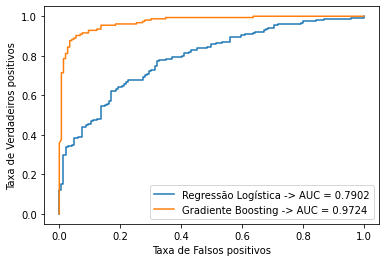

In [18]:
# regressão logistica

from cv2 import threshold
from sklearn import metrics
from sklearn import datasets
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np
import matplotlib.pyplot as plt

X, y = datasets.make_classification(n_samples=1000,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=1,
                                    random_state=0)

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = .3, random_state= 0)

modelo_Reg_Log = LogisticRegression()
modelo_Reg_Log.fit(X_treino,y_treino)
y_predito = modelo_Reg_Log.predict_proba(X_teste)[:,1]
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_teste,y_predito)
auc = round(metrics.roc_auc_score(y_teste,y_predito),4)

plt.plot(false_positive_rate,true_positive_rate, label = "Regressão Logística -> AUC = "+ str(auc))

modelo_Grad_Booosted = GradientBoostingClassifier()
modelo_Grad_Booosted.fit(X_treino,y_treino)
y_predito = modelo_Grad_Booosted.predict_proba(X_teste)[:,1]
false_positive_rate,true_positive_rate, _ = metrics.roc_curve(y_teste, y_predito)
auc = round(metrics.roc_auc_score(y_teste,y_predito),4)


plt.plot(false_positive_rate,true_positive_rate, label = "Gradiente Boosting -> AUC = "+ str(auc))

plt.xlabel("Taxa de Falsos positivos")
plt.ylabel("Taxa de Verdadeiros positivos")
plt.legend()
plt.show()

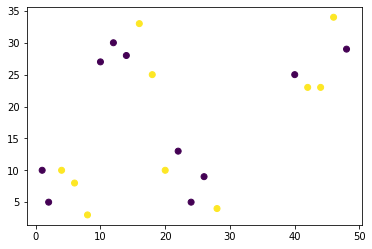

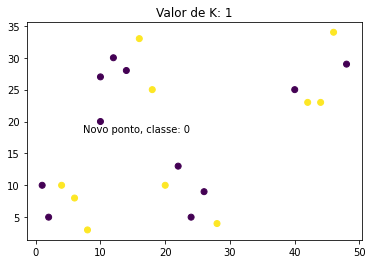

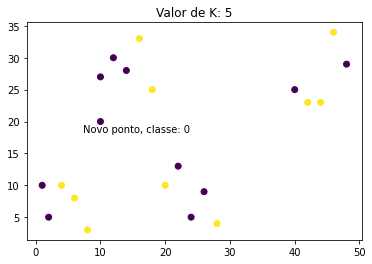

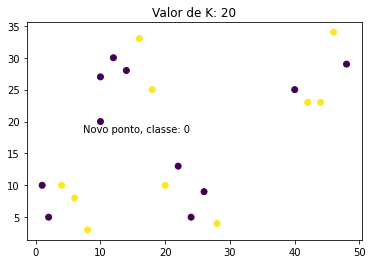

In [22]:
#KNN

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x = [ 1, 2,  4,   6,  8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,   40,  42,  44,  46,  48]
y = [10, 5,  10,  8,  3,  27,  30,  28,  33,  25,  10,  13,   5,   9,   4,   25,  23,  23,  34,  29]

# Definimos previamento os tipos de classificadores (labels de etrada para o medelo)
classes = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]

plt.scatter(x,y,c=classes)

plt.show()

dados = list(zip(x,y))

def preditor_KNN(K):
    knn = KNeighborsClassifier(n_neighbors=K)

    knn.fit(dados,classes)

    novo_x = 10
    novo_y = 20
    novo_ponto = [(novo_x,novo_y)]

    predicao = knn.predict(novo_ponto)

    plt.scatter(x + [novo_x], y + [novo_y], c = classes + [predicao[0]])

    plt.text(x = novo_x- 2.7, y= novo_y - 1.7, s = f"Novo ponto, classe: {predicao[0]}")

    plt.title(f"Valor de K: {K}")
    plt.show()


preditor_KNN(K = 1)
preditor_KNN(K = 5)
preditor_KNN(K = 20)




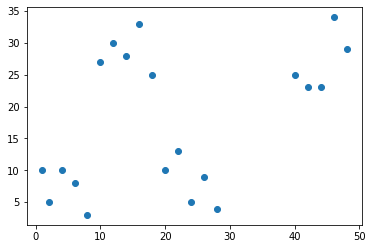

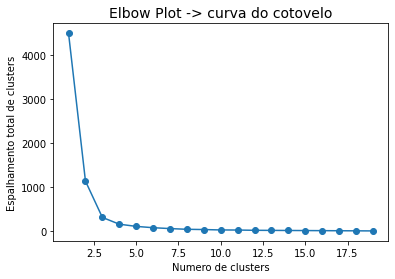

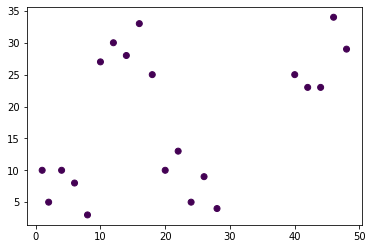

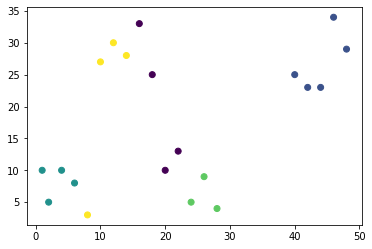

In [28]:
from cv2 import kmeans
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = [ 1, 2,  4,   6,  8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,   40,  42,  44,  46,  48]
y = [10, 5,  10,  8,  3,  27,  30,  28,  33,  25,  10,  13,   5,   9,   4,   25,  23,  23,  34,  29]


plt.scatter(x,y)
plt.show()


data = pd.DataFrame(x,y)

espalhamento_clusters = []

for i in range(1,len(data)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    espalhamento_clusters.append(round(kmeans.inertia_))

plt.plot(range(1,len(data)), espalhamento_clusters, marker='o')

plt.title('Elbow Plot -> curva do cotovelo', fontsize=14)
plt.xlabel("Numero de clusters")
plt.ylabel("Espalhamento total de clusters")
plt.show()

def Plota_Clusters(K):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data)
    plt.scatter(x,y, c= kmeans.labels_)
    plt.show()


Plota_Clusters(1)
Plota_Clusters(5)